In [133]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
date_parser = lambda x : pd.to_datetime(x, unit='ms')
df_price = pd.read_csv('data/player_price.csv', parse_dates=['timestamp'], date_parser=date_parser)
df_stats = pd.read_csv('data/player_stats.csv')

In [26]:
df_price.shape

(980252, 5)

In [8]:
df_stats.shape

(4601, 78)

In [28]:
df_price.columns

Index(['timestamp', 'ps_price', 'xbox_price', 'player_id', 'player_name'], dtype='object')

In [11]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980252 entries, 0 to 980251
Data columns (total 5 columns):
timestamp      980252 non-null int64
ps_price       980252 non-null int64
xbox_price     980252 non-null int64
player_id      980252 non-null int64
player_name    980252 non-null object
dtypes: int64(4), object(1)
memory usage: 37.4+ MB


In [88]:
df_price.describe()

,ps_price,xbox_price,player_id
count,9.802520e+05,9.802520e+05,980252.000000
mean,2.562450e+04,3.288325e+04,6099.262621
std,1.594880e+05,1.889719e+05,6611.171770
min,0.000000e+00,0.000000e+00,1.000000
25%,4.610000e+02,5.190000e+02,974.000000
50%,7.830000e+02,8.850000e+02,2373.000000
75%,2.370000e+03,3.255000e+03,14730.250000
max,7.263229e+06,1.000000e+07,19111.000000


In [31]:
df_price.head()

,timestamp,ps_price,xbox_price,player_id,player_name
0,2016-09-23,0,0,1,Pelé
1,2016-09-24,0,10000000,1,Pelé
2,2016-09-25,0,0,1,Pelé
3,2016-09-26,0,0,1,Pelé
4,2016-09-27,0,10000000,1,Pelé


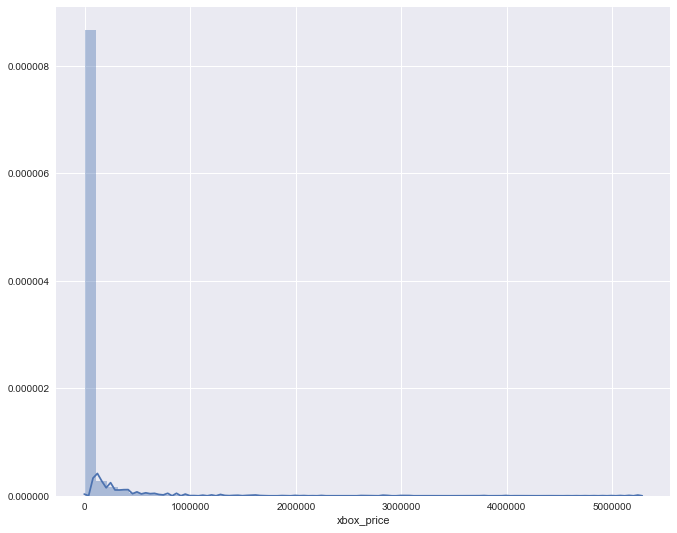

In [111]:
sns.distplot(df_price.groupby('player_id')['xbox_price'].median())

Unique player_id = 4601


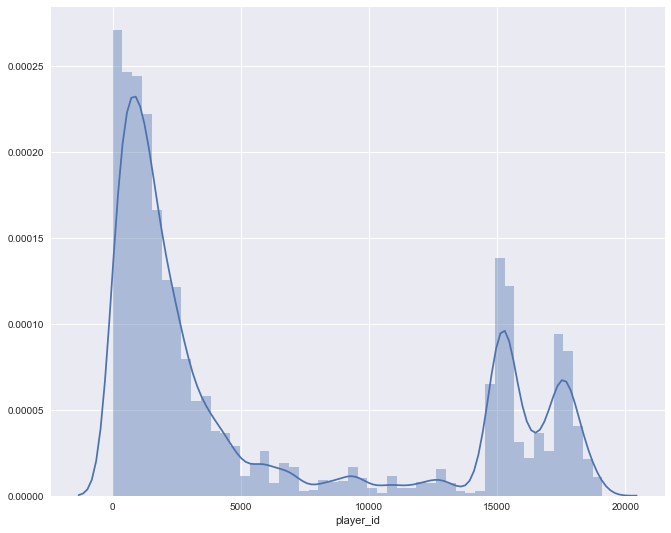

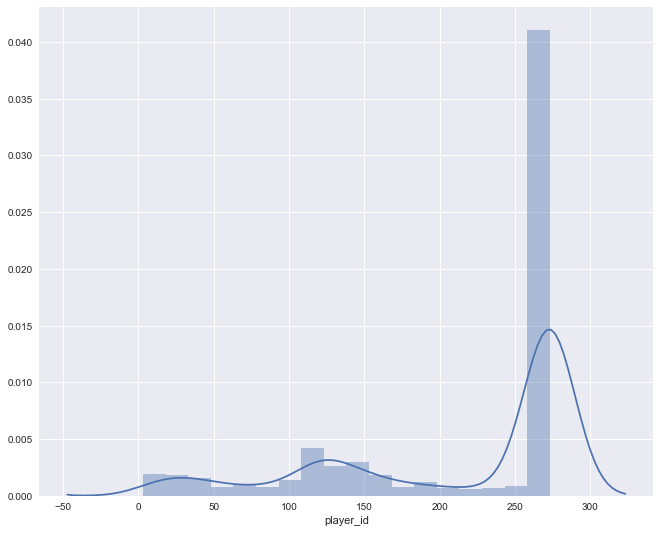

In [108]:
print('Unique player_id = {}'.format(len(df_price['player_id'].unique())))
plt.figure()
sns.distplot(df_price['player_id'])
plt.figure()
sns.distplot(df_price['player_id'].value_counts())

In [79]:
# df_price['ps_price'].resample( 'MS').mean()
df_price['player_name'].value_counts(sort=True).head()

Sánchez      2268
Hernández    2212
Dembélé      1987
Traoré       1967
Kane         1678
Name: player_name, dtype: int64

In [ ]:
print('Date period: from {} to {}'.format(df_price['timestamp'].min(), df_price['timestamp'].max()))

0 1678


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


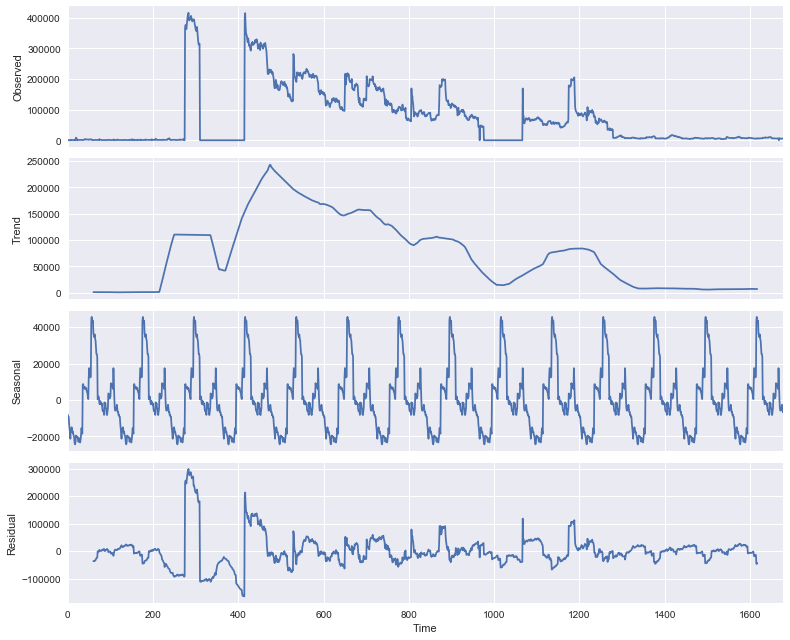

In [115]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
kaneSeries = df_price[df_price.player_name == 'Kane']['ps_price']
kaneSeries.index= df_price[df_price.player_name == 'Kane']['timestamp']

print(kaneSeries.isnull().sum(), kaneSeries.notnull().sum())
kaneSeries.fillna(method='ffill', inplace=True)
kaneSeries.fillna(method='bfill', inplace=True)
decomposition = sm.tsa.seasonal_decompose(kaneSeries.values, freq=120)
fig = decomposition.plot()

In [85]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [98]:
def tsplot(df, lags=None, figsize=(12, 7), style='bmh'):
   
    if not isinstance(df, pd.Series):
        y = df['xbox_price']
        y.index = df['timestamp']
    else:
         y = df
            
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()

Критерий Дики-Фуллера: p=0.002186


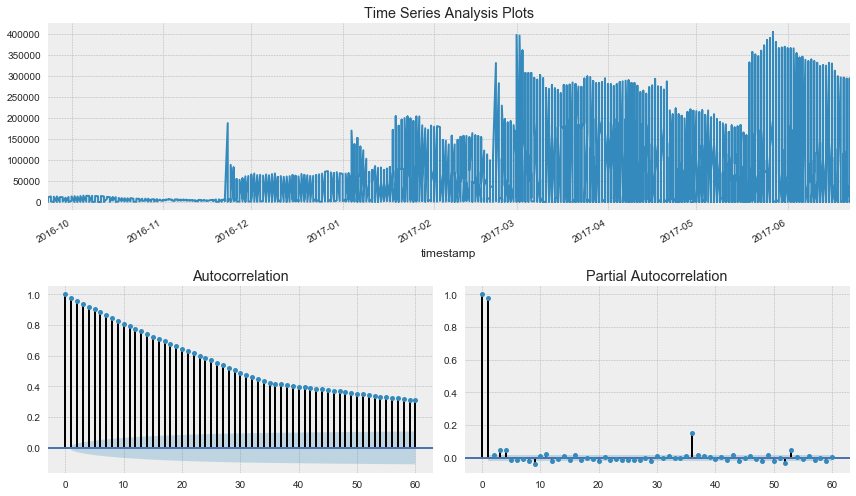

In [99]:
tsplot(df_price[df_price.player_name == 'Kane'], lags=60)

In [119]:
df = df_price.merge(df_stats, on='player_id')
df.shape

(980252, 82)

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [138]:
colLabelEncode = df.select_dtypes(include=['object']).columns
print(colLabelEncode)
for col in colLabelEncode:
    df[col]=pd.factorize(df[col])[0]
X,y = df.drop(['xbox_price', 'ps_price', 'timestamp'], axis=1), df['xbox_price']

transformer = ReduceVIF()
X = transformer.fit_transform(X, y)#X.columns[-10:]
print(X.columns)

Index([], dtype='object')


ReduceVIF fit
